# Word2vec Implementation (40 pts)

In this assignment, you will implement the Word2Vec Skip-gram model using the naive softmax loss function, without applying any optimizations such as negative sampling. This will help you understand the core concepts of word embedding and how probabilities are computed in the original formulation of Word2Vec.

You will use PyTorch for the implementation. By the end, you should have a working model and a visualization of word embeddings.


## Cautions
* Implement the solution **without** importing additional libraries.
* Do **not** modify any part of the code that is not explicitly marked with “YOUR CODE.”

**Corpus**

We will use the following nano corpus to train the Word2Vec model:

In [2]:
corpus = [
    'He is a king.',
    'She is a queen.',
    'He is a man.',
    'She is a woman.',
    'Warsaw is poland capital.',
    'Berlin is germany capital.',
    'Paris is france capital.',
]

## Problem 1. Tokenization and Vocabulary Building (10 pts)
You will start by tokenizing the corpus and building the word dictionary.

### (a) Complete the <code>tokenizer</code> function. (5 pts)

**Instructions**

The function tokenizes the corpus into words. Words in the given corpus are separated by spaces. All words should be converted to lowercase and any unnecessary punctuation should be removed.

In [3]:
import re

def tokenizer(sentences: list[str]
                    ) -> list[list[str]]:

    '''
    # HINT
    You should return the following results:

    [['he', 'is', 'a', 'king'],
    ['she', 'is', 'a', 'queen'],
    ['he', 'is', 'a', 'man'],
    ['she', 'is', 'a', 'woman'],
    ['warsaw', 'is', 'poland', 'capital'],
    ['berlin', 'is', 'germany', 'capital'],
    ['paris', 'is', 'france', 'capital']]
    '''

    ###############Your Code################
    # Replace "pass" statement with your code
    tokenized_sentences = []
    for sentence in sentences:
        # Convert to lowercase
        sentence = sentence.lower()
        # Remove punctuation and split into words
        words = re.sub(r'[^\w\s]', '', sentence).split()
        tokenized_sentences.append(words)

    ########################################

    return tokenized_sentences


tokenized_sentences = tokenizer(corpus)

# Output results
print(tokenized_sentences)

[['he', 'is', 'a', 'king'], ['she', 'is', 'a', 'queen'], ['he', 'is', 'a', 'man'], ['she', 'is', 'a', 'woman'], ['warsaw', 'is', 'poland', 'capital'], ['berlin', 'is', 'germany', 'capital'], ['paris', 'is', 'france', 'capital']]


### (b) Complete the <code>build_vocab</code> function.  (5 pts)

**Instructions**


The fuction iterates over the tokenized sentences and generate a list of unique words (vocabulary).

Then it creates 2 dictionaries mapping between word and index.
* word2idx: A mapping from each word to its corresponding index
* idx2word: A reverse mapping from each index to its corresponding word

The function should return 3 outputs: vocabulary (list), word2idx (dict), idx2word (dict).

In [4]:
def build_vocab(tokenized_sentences: list[list[str]]
                ) -> tuple[list[str], dict[str, int], dict[int, str]]:

    '''
    # HINT
    You should return the following results:

    vocabulary
    ['he', 'is', 'a', 'king', ... ]

    word2idx
    {'he': 0, 'is': 1, 'a': 2, 'king': 3, 'she': 4, ... }

    idx2word
    {0: 'he', 1: 'is', 2: 'a', 3: 'king', 4: 'she', ... }
    '''

    vocabulary = []
    word2idx = {}
    idx2word = {}

    ###############Your Code################
    # Replace "pass" statement with your code
    for sentence in tokenized_sentences:
        for word in sentence:
            if word not in word2idx:
                idx = len(vocabulary)
                vocabulary.append(word)
                word2idx[word] = idx
                idx2word[idx] = word

    ########################################

    return vocabulary, word2idx, idx2word


vocabulary, word2idx, idx2word = build_vocab(tokenized_sentences)
vocabulary_size = len(vocabulary)

# Output results
print(vocabulary)
print(word2idx)
print(idx2word)

['he', 'is', 'a', 'king', 'she', 'queen', 'man', 'woman', 'warsaw', 'poland', 'capital', 'berlin', 'germany', 'paris', 'france']
{'he': 0, 'is': 1, 'a': 2, 'king': 3, 'she': 4, 'queen': 5, 'man': 6, 'woman': 7, 'warsaw': 8, 'poland': 9, 'capital': 10, 'berlin': 11, 'germany': 12, 'paris': 13, 'france': 14}
{0: 'he', 1: 'is', 2: 'a', 3: 'king', 4: 'she', 5: 'queen', 6: 'man', 7: 'woman', 8: 'warsaw', 9: 'poland', 10: 'capital', 11: 'berlin', 12: 'germany', 13: 'paris', 14: 'france'}


## Problem 2. Generate Training Data (8 pts)

In the Skip-gram model, the training data consists of pairs of center words and their corresponding context words within a given window size.

Assume the window is symmetric and has a size of 2. For example, if the sentence is “he is a king” and the center word is “is”, the appropriate pairs would be:
* (center: “is”, context: “he”)
* (center: “is”, context: “a”)
* (center: “is”, context: “king”)

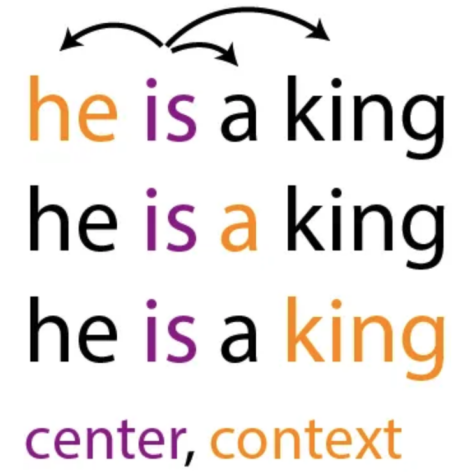

### Complete the <code>generate_positive_pairs</code> function. (8 pts)

**Instructions**

The function returns a list of pairs, where each pair consists of the index of the center word and the index of its corresponding context word.

In [5]:
def generate_positive_pairs(tokenized_sentences: list[list[str]],
                            word2idx: dict[str, int],
                            window_size: int=2
                            )-> list[tuple[int, int]]:

    '''
    * HINT

    You should return the following result:
    [(0, 1), (0, 2), (1, 0), (1, 2), (1, 3), ... )

    Which can be easily translated to words:
    [(he, is), (he, a), (is, he), (is, a), (is, king), ... ]
    '''

    positive_pairs = []
    for sentence in tokenized_sentences:
        word_indices = [word2idx[word] for word in sentence]
        for center_pos, center_word_idx in enumerate(word_indices):

            ###############Your Code################
            # Replace "pass" statement with your code
            start = max(0, center_pos - window_size)
            end = min(len(word_indices), center_pos + window_size + 1)
            for context_pos in range(start, end):
                if context_pos != center_pos:
                    context_word_idx = word_indices[context_pos]
                    positive_pairs.append((center_word_idx, context_word_idx))
                

            ########################################

    return positive_pairs


positive_pairs = generate_positive_pairs(tokenized_sentences, word2idx)

# Output results
print(positive_pairs)

[(0, 1), (0, 2), (1, 0), (1, 2), (1, 3), (2, 0), (2, 1), (2, 3), (3, 1), (3, 2), (4, 1), (4, 2), (1, 4), (1, 2), (1, 5), (2, 4), (2, 1), (2, 5), (5, 1), (5, 2), (0, 1), (0, 2), (1, 0), (1, 2), (1, 6), (2, 0), (2, 1), (2, 6), (6, 1), (6, 2), (4, 1), (4, 2), (1, 4), (1, 2), (1, 7), (2, 4), (2, 1), (2, 7), (7, 1), (7, 2), (8, 1), (8, 9), (1, 8), (1, 9), (1, 10), (9, 8), (9, 1), (9, 10), (10, 1), (10, 9), (11, 1), (11, 12), (1, 11), (1, 12), (1, 10), (12, 11), (12, 1), (12, 10), (10, 1), (10, 12), (13, 1), (13, 14), (1, 13), (1, 14), (1, 10), (14, 13), (14, 1), (14, 10), (10, 1), (10, 14)]


## Problem 3. Implement Skip-gram Model with Softmax (18 pts)

In the Skip-gram model, our goal is to predict context words given a center word. The objective is to maximize the probability of observing context words surrounding a given center word.

The probability of a context word given a center word is calculated as follows:

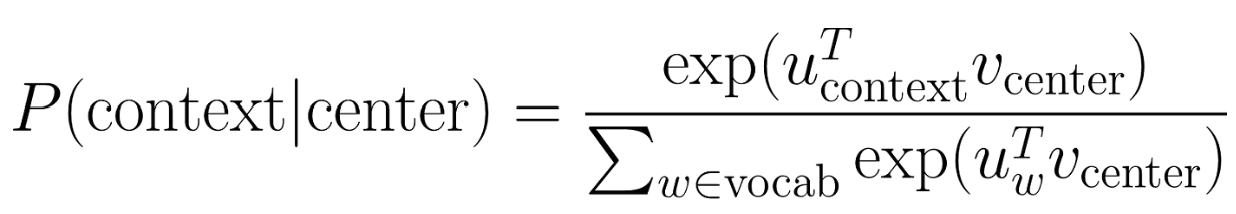

i.e.,
* The similarity between the context vector and the center vector is computed using the dot product.
* This similarity score is then normalized using the softmax function.

The model is trained by minimizing the negative log likelihood of the true context words for all center-context word pairs across the entire corpus.

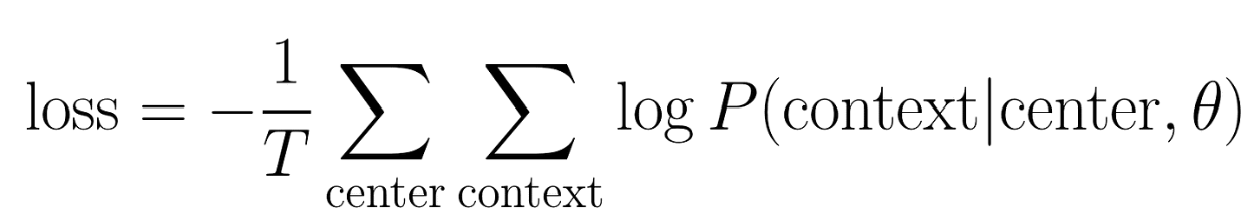

In this question, you will implement functions required to compute the negative log likelihood for a single center-context word pair.

### (a) Complete the <code>one_hot_encoder</code> function. (5 pts)

**Instructions**

The function converts a word index into a one-hot vector.

In [6]:
import torch
torch.manual_seed(1)

def one_hot_encoder(word_idx: int, vocabulary_size: int
                    ) -> torch.Tensor:

    '''
    * HINT

    It returns a tensor of shape (vocabulary_size)
    '''

    ##################YOUR CODE######################
    # Replace "pass" statement with your code
    x = torch.zeros(vocabulary_size, dtype=torch.float32)
    x[word_idx] = 1.0

    #################################################

    return x

### (b) Define the Center and Context matrices (5 pts)

**Instructions**

You are required to initilize two matrices: the center matrix V and the context matrix U.

* Each column of the center matrix V represents a center word in the vocabulary, and each column is a vector of size 5.
* Similarly, the context matrix U contains vectors for context words, with each column being a vector of size 5.

Both matrices V and U should be filled with random numbers drawn from a normal distribution.

In [16]:
embedding_dims = 5

'''
* HINT

V is a tensor of shape (embedding_dims, vocabulary_size)
U is a tensor of shape (embedding_dims, vocabulary_size)
'''

##################YOUR CODE######################
# Replace "None" with your code

V = torch.randn(embedding_dims, vocabulary_size, dtype=torch.float32, requires_grad=True)
U = torch.randn(embedding_dims, vocabulary_size, dtype=torch.float32, requires_grad=True)

#################################################

### (c) Complete the <code>softmax_loss</code> function. (8 pts)

**Instructions**

The function computes and return the negative log likelihood for a single center-context word pair.

In [17]:
def softmax(x: torch.Tensor
            ) -> torch.Tensor:
    exp_x = torch.exp(x - torch.max(x))  # for numerical stability
    return exp_x / exp_x.sum(dim=0)


def softmax_loss(V: torch.Tensor,
                U: torch.Tensor,
                center_word_idx: int,
                context_word_idx: int,
                vocabulary_size: int
                ) -> torch.Tensor:

    '''
    * HINT

    1. Compute the dot product between the center word vector (from matrix V) and the context matrix U
    2. Apply the softmax function to the computed result
    3. Return the negative log likelihood loss for the true context word

    (+) Utilize previously implemented functions - one_hot_encoder, softmax
    '''

    loss = None

    ##################YOUR CODE######################
    # Replace "pass" statement with your code
    center_word_vector = V[:, center_word_idx]  # shape: (embedding_dims,)
    logits = torch.matmul(center_word_vector,U)
    probabilities = softmax(logits)  # shape: (vocabulary_size,)
    loss = -torch.log(probabilities[context_word_idx] + 1e-10)  # Adding a small value for numerical stability

    #################################################

    return loss

## Problem 4. Training and Visualization (4 pts)

**Instructions**

Train your Skip-gram model using the loss function you just implemented. After training, visualize the learned word embeddings using PCA to reduce the embedding dimensions to 2D space.

You just need to run the code without making any modifications.

In [18]:
# Training loop
num_epochs = 500
learning_rate = 0.005

for epoch in range(num_epochs):
    total_loss = 0
    for center_word_idx, context_word_idx in positive_pairs:
        # Compute loss using softmax
        loss = softmax_loss(V, U, center_word_idx, context_word_idx, vocabulary_size)
        total_loss += loss.item()

        # Backpropagation
        loss.backward()

        # Update the weight matrices
        with torch.no_grad():
            V -= learning_rate * V.grad
            U -= learning_rate * U.grad

        # Zero out the gradients for the next iteration
        V.grad.zero_()
        U.grad.zero_()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {total_loss / len(positive_pairs)}')

Epoch 0, Loss: 5.166863115743867
Epoch 10, Loss: 3.2127802542277744
Epoch 20, Loss: 2.7478056575570786
Epoch 30, Loss: 2.504501805135182
Epoch 40, Loss: 2.335589520420347
Epoch 50, Loss: 2.210264368568148
Epoch 60, Loss: 2.115755819422858
Epoch 70, Loss: 2.0432532361575535
Epoch 80, Loss: 1.986575345482145
Epoch 90, Loss: 1.941326710156032
Epoch 100, Loss: 1.9042967557907104
Epoch 110, Loss: 1.8731480479240417
Epoch 120, Loss: 1.8462336259228842
Epoch 130, Loss: 1.8224341562816075
Epoch 140, Loss: 1.8010090151003428
Epoch 150, Loss: 1.78147862468447
Epoch 160, Loss: 1.7635392814874649
Epoch 170, Loss: 1.7470024790082659
Epoch 180, Loss: 1.7317498109170368
Epoch 190, Loss: 1.7176962094647543
Epoch 200, Loss: 1.7047632234437124
Epoch 210, Loss: 1.6928634166717529
Epoch 220, Loss: 1.6818984968321664
Epoch 230, Loss: 1.6717667485986436
Epoch 240, Loss: 1.6623759022780826
Epoch 250, Loss: 1.6536517024040223
Epoch 260, Loss: 1.6455412179231643
Epoch 270, Loss: 1.6380104431084224
Epoch 280, L

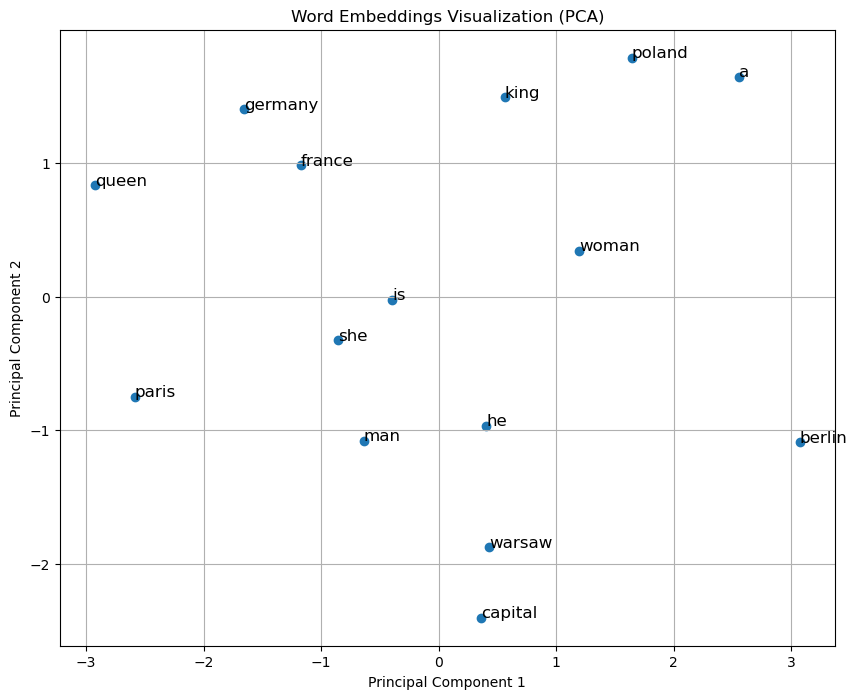

In [22]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

word_embeddings = V.detach().numpy()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_embeddings.T)

# Create a scatter plot for visualization
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

# Annotate the plot with words
for i, word in enumerate(vocabulary):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize=12)

plt.title('Word Embeddings Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()